In [14]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [21]:
#LOAD AND SPLIT DATASET

import numpy as np
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
'''f.keras.datasets.cifar10 → Accesses the CIFAR-10 dataset (60,000 color images of 10 categories).

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Splits the data into:

Training set: 50,000 images + labels

Test set: 10,000 images + labels

Each image is 32×32 pixels with 3 color channels (RGB).'''

In [22]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

print("Input Shape=",x_train.shape,y_train.shape)

num_classes = 10
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
'''Converts integer pixel values (0–255) to floating-point numbers between 0 and 1.

Normalization helps the model train faster and more accurately.

num_classes defines total number of categories.

class_names holds readable names for class indices (0–9).'''

Input Shape= (50000, 32, 32, 3) (50000, 1)


In [23]:
#Define N/W Architecture

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()
'''
Explanation (layer by layer):

Flatten(input_shape=(32,32,3))

Converts 3D image (32×32×3 = 3072 pixels) into a 1D vector of length 3072.

Required before feeding data into dense layers.

Dense(512, activation='relu')

Fully connected layer with 512 neurons.

Uses ReLU (Rectified Linear Unit) activation to introduce non-linearity.

Dense(256, activation='relu')

Another hidden layer with 256 neurons for deeper feature learning.

Dense(10, activation='softmax')

Output layer with 10 neurons (one for each class).

softmax converts outputs into class probability distributions.'''

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,707,274 (6.51 MB)

 Trainable params: 1,707,274 (6.51 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy']
)

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)
'''
Optimizer: 'adam' — Adaptive optimizer that adjusts learning rate automatically.

Loss: 'sparse_categorical_crossentropy' — Used when class labels are integers (not one-hot encoded).

Metrics: 'accuracy' — Tracks model accuracy during training.

model.fit() → Starts training process.

Inputs:

x_train, y_train → Training data and labels.

validation_data → Data used to check performance after each epoch.

epochs=5 → Runs over full training data 5 times.

history → Stores training and validation accuracy/loss per epoch (used later for plots).'''

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.3312 - loss: 1.8533 - val_accuracy: 0.3936 - val_loss: 1.6917
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 24ms/step - accuracy: 0.3994 - loss: 1.6675 - val_accuracy: 0.4186 - val_loss: 1.6360
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.4298 - loss: 1.5895 - val_accuracy: 0.4424 - val_loss: 1.5593
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 27ms/step - accuracy: 0.4460 - loss: 1.5410 - val_accuracy: 0.4512 - val_loss: 1.5634
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4618 - loss: 1.5086 - val_accuracy: 0.4644 - val_loss: 1.5096


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4702 - loss: 1.4949
Loss=1.495
Accuracy=0.470
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


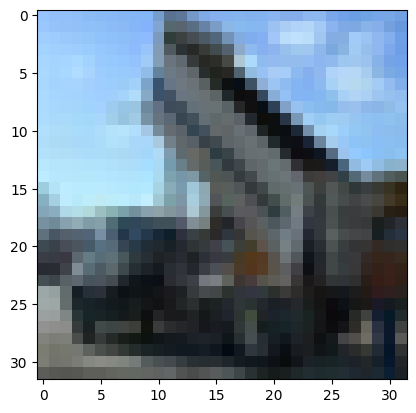

truck


In [13]:
#EVALUATE MODEL

test_loss, test_acc = model.evaluate(x_test,y_test)
print("Loss=%.3f"%test_loss)
print("Accuracy=%.3f"%test_acc)

predicted_value=model.predict(x_test)
plt.imshow(x_test[50])
plt.show()
print(class_names[np.argmax(predicted_value[50], axis=0)])

'''
model.predict(x_test) → Predicts class probabilities for all 10,000 test images.
Output shape: (10000, 10)

plt.imshow(x_test[50]) → Displays the 51st image from test set.

np.argmax(predicted_value[50], axis=0) → Finds the index of the highest probability (predicted class).

class_names[...] → Converts that index to the corresponding label name (e.g., 'truck').'''

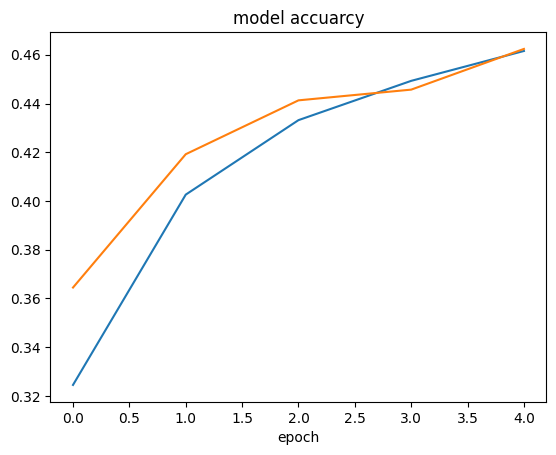

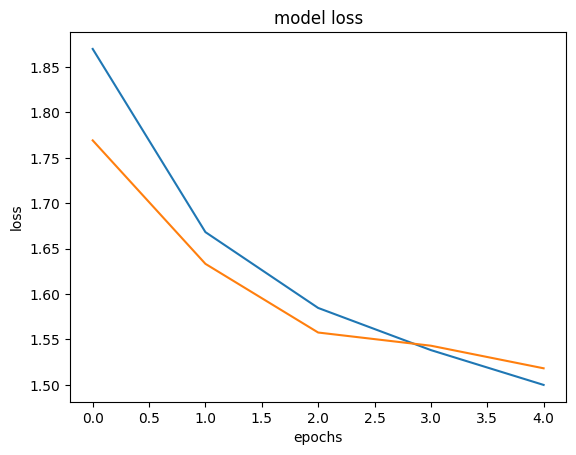

In [20]:

#model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuarcy")
plt.xlabel("epoch")
plt.show()

#model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()